## Assignment - Telephone Churn Case Study

In [677]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import gc # for deleting unused variables
%matplotlib inline
from sklearn.model_selection import GridSearchCV
import os
import warnings
warnings.filterwarnings('ignore')

In [581]:
#Importing dataset
telecom = pd.read_csv("telecom_churn_data.csv")

In [582]:
# Checking the structure of the Data
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### 1. Data Overview

In [583]:
print ("Rows     : " ,telecom.shape[0])
print ("Columns  : " ,telecom.shape[1])
print ("\nFeatures : \n" ,telecom.columns.tolist())
print ("\nMissing values :  ", telecom.isnull().sum().values.sum())
print ("\nUnique values :  \n",telecom.nunique())

Rows     :  99999
Columns  :  226

Features : 
 ['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og

### 2. Data Manupulation.

In [584]:
telecom['ARPU']=(telecom['arpu_6']+telecom['arpu_7'])/2
telecom.shape

(99999, 227)

In [585]:
# count the number of rows having > 182 (80%)missing values
len(telecom[telecom.isnull().sum(axis=1) > 182].index)

0

In [586]:
## Retaining only high value customers
Q1 = telecom.ARPU.quantile(0.70)
telecom_2 = telecom[(telecom.ARPU  > Q1)]
telecom_2.shape

(30000, 227)

In [587]:
#checking for null in the month 9 call and internet usage columns
telecom_2[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()*100/len(telecom_2)

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [588]:
#Tagging churned customers
def churn(row):
    if row['total_ic_mou_9']==row['total_og_mou_9']==row['vol_2g_mb_9']==row['vol_3g_mb_9']==0:
        val=1
    else:
        val=0
    return val

In [589]:
telecom_2['Churn']= telecom_2.apply(churn, axis =1)
telecom_2['Churn'].sum()

2652

In [590]:
#removing all the attributes corresponding to the churn phase
telecom_3 = telecom_2.drop([col for col in telecom_2.columns if "_9" in col], axis=1)
telecom_3.shape

(30000, 174)

In [591]:
telecom_3.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,ARPU,Churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1209.5150,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.

After seeing the description of the columns it is found that there are some columns whose values sums up to othe column. For example 'Total outgoing calls' is the sum of all the outgoing calls. Thus the outgoing calls columns are not required. Same is for some other variable.

In [592]:
# Removing duplicated variables
#for outgoing calls
telecom_4=telecom_3.drop(['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
                          'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_mou_6', 
                          'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 
                          'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 
                          'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 
                          'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 
                          'og_others_8'], axis=1)
#for incoming calls
telecom_4=telecom_4.drop(['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 
                          'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 
                          'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
                          'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 
                          'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7',
                          'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 
                          'ic_others_8'], axis=1)
#for data pack
telecom_4=telecom_4.drop(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 
                          'count_rech_3g_8'],axis=1)
telecom_4.shape

(30000, 102)

In [593]:
# checking for columns with no or less variance.
for col in telecom_4.columns:
    if (len(telecom_4[col].unique())<4):
        print(telecom_4[col].value_counts())
        print()

109    30000
Name: circle_id, dtype: int64

0.0    29872
Name: loc_og_t2o_mou, dtype: int64

0.0    29872
Name: std_og_t2o_mou, dtype: int64

0.0    29872
Name: loc_ic_t2o_mou, dtype: int64

6/30/2014    30000
Name: last_date_of_month_6, dtype: int64

7/31/2014    29958
Name: last_date_of_month_7, dtype: int64

8/31/2014    29804
Name: last_date_of_month_8, dtype: int64

0.0    29686
Name: std_og_t2c_mou_6, dtype: int64

0.0    29666
Name: std_og_t2c_mou_7, dtype: int64

0.0    28976
Name: std_og_t2c_mou_8, dtype: int64

0.0    29686
Name: std_ic_t2o_mou_6, dtype: int64

0.0    29666
Name: std_ic_t2o_mou_7, dtype: int64

0.0    28976
Name: std_ic_t2o_mou_8, dtype: int64

0.0    11235
1.0    312  
Name: night_pck_user_6, dtype: int64

0.0    11480
1.0    299  
Name: night_pck_user_7, dtype: int64

0.0    11615
1.0    281  
Name: night_pck_user_8, dtype: int64

1.0    10386
0.0    1161 
Name: fb_user_6, dtype: int64

1.0    10504
0.0    1275 
Name: fb_user_7, dtype: int64

1.0    9983
0.

Deleteing the columns 'circle_id, loc_og_t2o_mou,'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',std_og_t2o_mou, loc_ic_t2o_mou, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_ic_t2o_mou_6, std_ic_t2o_mou_7, std_ic_t2o_mou_8' as they have no or very less variance hence will not contribute to the model.

In [594]:
telecom_4=telecom_4.drop([ 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8', 'std_og_t2c_mou_6',
                          'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], axis=1)
telecom_4.shape

(30000, 89)

Creating new variables to show total call usage by customer i.e sum of all incoming and outgoing calls, all for total internet usage whether 2g or 3g.

In [595]:
# Creating new derived variable columns
telecom_4['total_call_6']=telecom_4['roam_ic_mou_6']+telecom_4['roam_og_mou_6']+telecom_4['total_og_mou_6']+telecom_4['total_ic_mou_6']
telecom_4['total_call_7']=telecom_4['roam_ic_mou_7']+telecom_4['roam_og_mou_7']+telecom_4['total_og_mou_7']+telecom_4['total_ic_mou_7']
telecom_4['total_call_8']=telecom_4['roam_ic_mou_8']+telecom_4['roam_og_mou_8']+telecom_4['total_og_mou_8']+telecom_4['total_ic_mou_8']
telecom_4['total_data_6']=telecom_4['vol_2g_mb_6']+telecom_4['vol_3g_mb_6']
telecom_4['total_data_7']=telecom_4['vol_2g_mb_7']+telecom_4['vol_3g_mb_7']
telecom_4['total_data_8']=telecom_4['vol_2g_mb_8']+telecom_4['vol_3g_mb_8']
telecom_4=telecom_4.drop(['roam_ic_mou_6','roam_og_mou_6','total_og_mou_6','total_ic_mou_6',
                         'roam_ic_mou_7','roam_og_mou_7','total_og_mou_7','total_ic_mou_7',
                         'roam_ic_mou_8','roam_og_mou_8','total_og_mou_8','total_ic_mou_8',
                         'vol_2g_mb_6','vol_3g_mb_6',
                         'vol_2g_mb_7','vol_3g_mb_7',
                         'vol_2g_mb_8','vol_3g_mb_8'], axis=1)

In [596]:
telecom_4.drop(["mobile_number","date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8"], axis = 1, inplace=True)

In [597]:
telecom_4.shape

(30000, 73)

In [598]:
#Identifying Missing Values in columns.
round(100 *(telecom_4.isnull().sum()/len(telecom_4.index)),2)

arpu_6                      0.00 
arpu_7                      0.00 
arpu_8                      0.00 
onnet_mou_6                 1.05 
onnet_mou_7                 1.11 
onnet_mou_8                 3.41 
offnet_mou_6                1.05 
offnet_mou_7                1.11 
offnet_mou_8                3.41 
loc_og_t2c_mou_6            1.05 
loc_og_t2c_mou_7            1.11 
loc_og_t2c_mou_8            3.41 
total_rech_num_6            0.00 
total_rech_num_7            0.00 
total_rech_num_8            0.00 
total_rech_amt_6            0.00 
total_rech_amt_7            0.00 
total_rech_amt_8            0.00 
max_rech_amt_6              0.00 
max_rech_amt_7              0.00 
max_rech_amt_8              0.00 
last_day_rch_amt_6          0.00 
last_day_rch_amt_7          0.00 
last_day_rch_amt_8          0.00 
date_of_last_rech_data_6    61.51
date_of_last_rech_data_7    60.74
date_of_last_rech_data_8    60.35
total_rech_data_6           61.51
total_rech_data_7           60.74
total_rech_dat

In [599]:
# Since av_rech_amt_data_* features are important for getting the high-value customers,
#lets impute the missing av_rech_amt_data_* with 0
imputeCol = ['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','arpu_2g_6','arpu_2g_7','arpu_2g_8', 'arpu_3g_6','arpu_3g_7','arpu_3g_8',
             'max_rech_data_6','max_rech_data_7','max_rech_data_8', 'total_rech_data_6','total_rech_data_7','total_rech_data_8','fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8']

telecom_4[imputeCol] = telecom_4[imputeCol].fillna(0)

In [600]:
#Identifying Missing Values in columns.
round(100 *(telecom_4.isnull().sum()/len(telecom_4.index)),2)

arpu_6                      0.00 
arpu_7                      0.00 
arpu_8                      0.00 
onnet_mou_6                 1.05 
onnet_mou_7                 1.11 
onnet_mou_8                 3.41 
offnet_mou_6                1.05 
offnet_mou_7                1.11 
offnet_mou_8                3.41 
loc_og_t2c_mou_6            1.05 
loc_og_t2c_mou_7            1.11 
loc_og_t2c_mou_8            3.41 
total_rech_num_6            0.00 
total_rech_num_7            0.00 
total_rech_num_8            0.00 
total_rech_amt_6            0.00 
total_rech_amt_7            0.00 
total_rech_amt_8            0.00 
max_rech_amt_6              0.00 
max_rech_amt_7              0.00 
max_rech_amt_8              0.00 
last_day_rch_amt_6          0.00 
last_day_rch_amt_7          0.00 
last_day_rch_amt_8          0.00 
date_of_last_rech_data_6    61.51
date_of_last_rech_data_7    60.74
date_of_last_rech_data_8    60.35
total_rech_data_6           0.00 
total_rech_data_7           0.00 
total_rech_dat

In [601]:
# Dropping columns where missing value >= 50%

telecom_4= telecom_4.loc[:, telecom_4.isnull().sum() < 0.5*telecom_4.shape[0]]

In [602]:
#Verifying Missing Values in columns.
round(100 *(telecom_4.isnull().sum()/len(telecom_4.index)),2)

arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
onnet_mou_6           1.05
onnet_mou_7           1.11
onnet_mou_8           3.41
offnet_mou_6          1.05
offnet_mou_7          1.11
offnet_mou_8          3.41
loc_og_t2c_mou_6      1.05
loc_og_t2c_mou_7      1.11
loc_og_t2c_mou_8      3.41
total_rech_num_6      0.00
total_rech_num_7      0.00
total_rech_num_8      0.00
total_rech_amt_6      0.00
total_rech_amt_7      0.00
total_rech_amt_8      0.00
max_rech_amt_6        0.00
max_rech_amt_7        0.00
max_rech_amt_8        0.00
last_day_rch_amt_6    0.00
last_day_rch_amt_7    0.00
last_day_rch_amt_8    0.00
total_rech_data_6     0.00
total_rech_data_7     0.00
total_rech_data_8     0.00
max_rech_data_6       0.00
max_rech_data_7       0.00
max_rech_data_8       0.00
av_rech_amt_data_6    0.00
av_rech_amt_data_7    0.00
av_rech_amt_data_8    0.00
arpu_3g_6             0.00
arpu_3g_7             0.00
arpu_3g_8             0.00
arpu_2g_6             0.00
a

In [603]:
# Checking rows where all the missing columns does not have any value
missingcol = ['total_call_6','total_call_7','total_call_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8']
len(telecom_4[telecom_4[missingcol].isnull().all(axis=1)])


136

We have 136 columns.

In [604]:
#Removing the columns
telecom_4=telecom_4[~telecom_4[missingcol].isnull().all(axis=1)]
telecom_4.shape

(29864, 70)

In [605]:
#Verifying Missing Values in columns.
round(100 *(telecom_4.isnull().sum()/len(telecom_4.index)),2)

arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
onnet_mou_6           0.60
onnet_mou_7           0.66
onnet_mou_8           2.97
offnet_mou_6          0.60
offnet_mou_7          0.66
offnet_mou_8          2.97
loc_og_t2c_mou_6      0.60
loc_og_t2c_mou_7      0.66
loc_og_t2c_mou_8      2.97
total_rech_num_6      0.00
total_rech_num_7      0.00
total_rech_num_8      0.00
total_rech_amt_6      0.00
total_rech_amt_7      0.00
total_rech_amt_8      0.00
max_rech_amt_6        0.00
max_rech_amt_7        0.00
max_rech_amt_8        0.00
last_day_rch_amt_6    0.00
last_day_rch_amt_7    0.00
last_day_rch_amt_8    0.00
total_rech_data_6     0.00
total_rech_data_7     0.00
total_rech_data_8     0.00
max_rech_data_6       0.00
max_rech_data_7       0.00
max_rech_data_8       0.00
av_rech_amt_data_6    0.00
av_rech_amt_data_7    0.00
av_rech_amt_data_8    0.00
arpu_3g_6             0.00
arpu_3g_7             0.00
arpu_3g_8             0.00
arpu_2g_6             0.00
a

In [606]:
#Replacing missing values with 0.
telecom_4[missingcol] = telecom_4[missingcol].fillna(0)

In [607]:
#Verifying Missing Values in columns.
round(100 *(telecom_4.isnull().sum()/len(telecom_4.index)),2)

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
arpu_3g_6             0.0
arpu_3g_7             0.0
arpu_3g_8             0.0
arpu_2g_6             0.0
arpu_2g_7             0.0
arpu_2g_8   

In [608]:
telecom_4.shape

(29864, 70)

In [609]:
print(list(telecom_4.columns))

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_v

In [612]:
# removing 'sep_vbc_3g' as not required for modeling.
telecom_4 = telecom_4.drop(['sep_vbc_3g'],axis =1)
print(list(telecom_4.columns))

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_v

### EDA

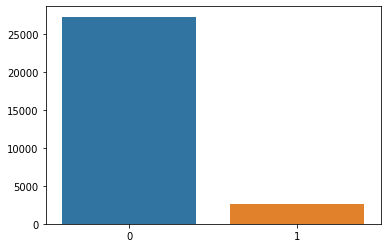

In [613]:
# Checking Churn Percentage in the data set.
y = telecom_4["Churn"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

In [614]:
y_True = telecom_4["Churn"][telecom_4["Churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / telecom_4["Churn"].shape[0]) * 100 ))

Churn Percentage = 8.662603803911063


Imbalanced data - Lesser datapoints in True Churn category.

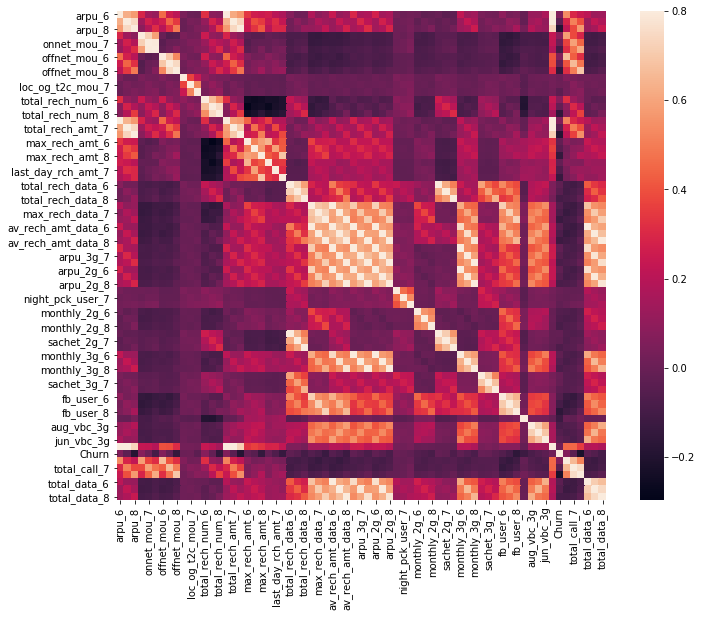

In [615]:
# Correlation Matrix Heatmap
corrmat = telecom_4.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [616]:
# Checking feature 'aon' as 'Age on Network'
telecom_4.aon.describe()


count    29864.000000
mean     1268.253014 
std      977.759762  
min      180.000000  
25%      480.000000  
50%      918.000000  
75%      1942.000000 
max      4321.000000 
Name: aon, dtype: float64

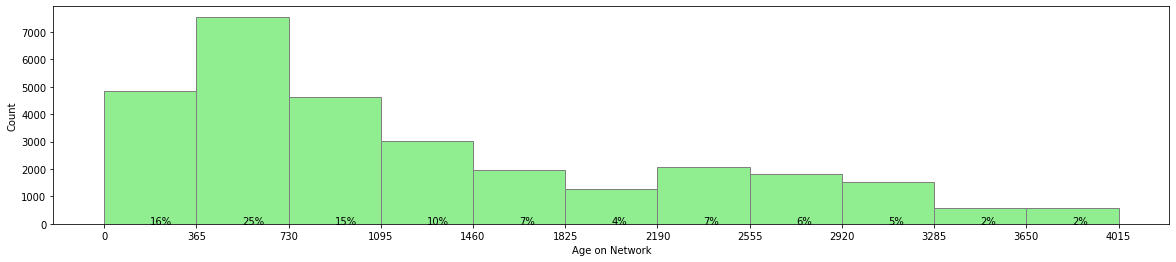

In [617]:
fig, ax = plt.subplots(figsize=(20,4))
counts, bins, patches = ax.hist(telecom_4['aon'],bins=range(0,telecom_4['aon'].max(),round(365)),facecolor='lightgreen',edgecolor='gray')
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent,xy=(x,0.2))
    
ax.set_xlabel('Age on Network')
ax.set_ylabel('Count')
plt.show()

Observation:
1. Minimun Age on network is 180 days.
2. Average age on network for customers is 1200 days (3.2 years).
3. 27% of the High Value users are in their 2nd year with the network.
4. Almost 71% users have Age on network less than 4 years.
5. 15% users are with the network from over 7 years.

In [618]:
def plot_byChurn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(telecom_4.groupby('Churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    # Numeric stats for per month churn vs Non-Churn
    return telecom_4.groupby('Churn')[colList].mean()

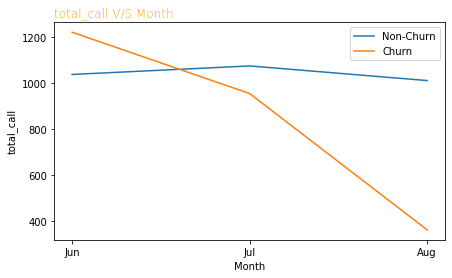

,total_call_6,total_call_7,total_call_8
Churn,,,
0,1037.256867,1074.163665,1010.797249
1,1220.257333,954.448748,363.221009


In [619]:
# Total call usage vs Churn.
plot_byChurn(telecom_4,'total_call')

Total call usage drops significantly for churners from month Jul(6) to Aug(7).
While it remains almost consistent for the non-churners.

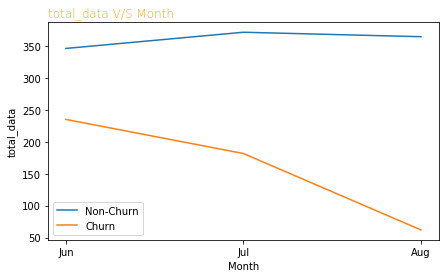

,total_data_6,total_data_7,total_data_8
Churn,,,
0,346.299882,371.668280,364.669544
1,235.111438,181.659776,61.958894


In [620]:
# Total Data Usage vs Churn
plot_byChurn(telecom_4,'total_data')

Total Data usage  drops significantly for churners from month Jul(6) to Aug(7).
While it remains almost consistent for the non-churners.

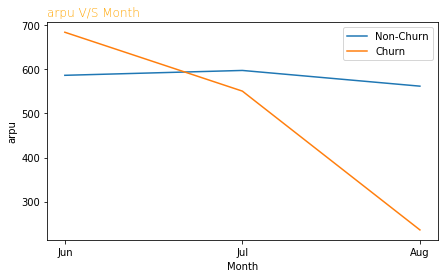

,arpu_6,arpu_7,arpu_8
Churn,,,
0,586.254105,597.278871,561.676586
1,683.833741,550.440463,235.956928


In [621]:
# Total Arpu vs Churn.

plot_byChurn(telecom_4,'arpu')

Average revenue per user,arpu also drops significantly for churners from month Jul(6) to Aug(7).
While it remains almost consistent for the non-churners.

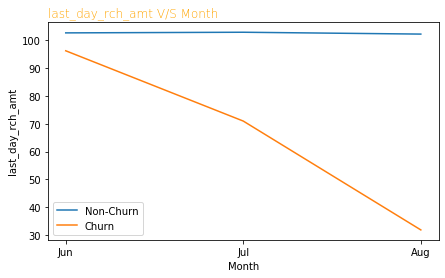

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
Churn,,,
0,102.543205,102.771786,102.110056
1,96.127561,70.935833,31.926169


In [622]:
# last day recharge amount vs Churn
plot_byChurn(telecom_4,'last_day_rch_amt')

The avg. last recharge amount for churners is less than half the amount of that of the non-churners. It seems when recharge amount reduces for a customer its chances to churn increases.

In [623]:
# Splitting the data set in X and y.
y = telecom_4['Churn'].values
X = telecom_4.drop(columns = ['Churn'])

In [624]:
X.shape

(29864, 68)

In [625]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [626]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [627]:
X_train.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,ARPU,total_call_6,total_call_7,total_call_8,total_data_6,total_data_7,total_data_8
count,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000,20904.000000
mean,0.088578,0.046100,0.042826,0.040741,0.037344,0.024649,0.050426,0.043537,0.026313,0.004523,0.003302,0.004919,0.039853,0.086879,0.052538,0.019725,0.017039,0.013622,0.047080,0.051543,0.036930,0.031107,0.032270,0.021520,0.015677,0.019807,0.017481,0.036893,0.037664,0.035735,0.012092,0.022441,0.022333,0.011604,0.016374,0.019409,0.010140,0.013973,0.020753,0.010524,0.009855,0.009233,0.031657,0.026665,0.022953,0.013073,0.012369,0.014002,0.012506,0.011643,0.011000,0.004992,0.004734,0.003463,0.346776,0.351368,0.331994,0.263545,0.010121,0.014980,0.011011,0.008900,0.085819,0.092546,0.067450,0.007385,0.012634,0.011355
std,0.015018,0.013090,0.014554,0.062980,0.059451,0.043348,0.056029,0.049513,0.032359,0.020319,0.017633,0.021965,0.031256,0.070295,0.048626,0.015489,0.014211,0.013732,0.047130,0.052793,0.039487,0.041731,0.043135,0.032620,0.036116,0.045147,0.040187,0.066942,0.068099,0.066968,0.024033,0.044928,0.045601,0.025953,0.034670,0.043501,0.022308,0.032640,0.041195,0.102049,0.098782,0.095645,0.094233,0.077927,0.071582,0.043913,0.040137,0.042172,0.040140,0.038989,0.036383,0.031450,0.029888,0.023858,0.475955,0.477409,0.470940,0.236816,0.030302,0.044432,0.034175,0.013367,0.064275,0.070626,0.058359,0.018739,0.031812,0.030045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000407,0.000000,0.000000,0.000000,0.000000,0.004479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.081153,0.039958,0.035746,0.005813,0.004981,0.002442,0.016850,0.014038,0.006622,0.000000,0.000000,0.000000,0.019544,0.043478,0.020408,0.012219,0.010314,0.006973,0.030908,0.033343,0.015060,0.009094,0.008065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003099,0.005201,0.005363,0.002376,0.

### Model building and evaluation.

In [628]:
# Handaling Class imbalance using Synthetic Minority Over-sampling Technique.
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1903
Before OverSampling, counts of label '0': 19001 

Before OverSampling, churn event rate : 9.1% 



In [629]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [630]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (38002, 68)
After OverSampling, the shape of train_y: (38002,) 

After OverSampling, counts of label '1': 19001
After OverSampling, counts of label '0': 19001
After OverSampling, churn event rate : 50.0% 



Now the data set is balanced.

#### PCA on the data

In [631]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [632]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [633]:
pca.components_

array([[ 1.34461951e-03,  1.48350761e-03,  2.36898889e-03, ...,
         1.34643610e-02,  2.36457824e-02,  2.15081865e-02],
       [ 2.65277370e-03, -2.82937769e-03, -7.23260840e-03, ...,
         9.96225580e-03, -8.99931682e-05, -1.65101500e-02],
       [ 4.28455313e-03, -3.22857133e-03,  2.98524306e-03, ...,
         5.91955810e-03, -1.54775191e-02,  8.28403612e-03],
       ...,
       [-0.00000000e+00,  4.62276618e-16, -2.20598940e-17, ...,
         5.73501544e-17,  2.04378573e-17, -2.89174008e-17],
       [-0.00000000e+00,  4.29898123e-16, -7.42520365e-16, ...,
        -6.13030251e-17,  4.61889742e-16, -1.66677877e-17],
       [ 0.00000000e+00,  1.19014012e-15,  4.68575073e-17, ...,
         1.43169342e-16,  1.27047465e-16,  4.34992003e-16]])

In [634]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.001345,0.002653,arpu_6
1,0.001484,-0.002829,arpu_7
2,0.002369,-0.007233,arpu_8
3,-0.014626,-0.002213,onnet_mou_6
4,-0.013154,-0.009442,onnet_mou_7


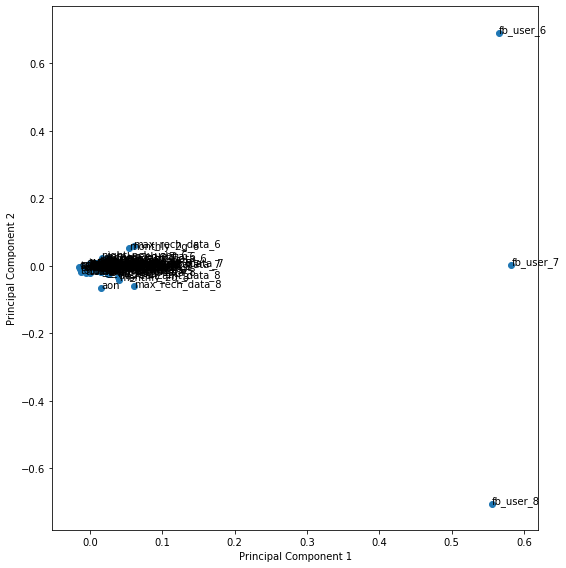

In [635]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

We can see that first principal component is heavy towards 'fb_user'.

In [636]:
#Looking at the screeplot to assess the number of needed principal components.
pca.explained_variance_ratio_

array([6.29344955e-01, 9.10613066e-02, 7.09354603e-02, 6.42545496e-02,
       2.24782631e-02, 1.75750756e-02, 1.64436623e-02, 1.31693574e-02,
       7.82638058e-03, 7.50858824e-03, 6.49721930e-03, 5.32920997e-03,
       5.04052513e-03, 4.46903558e-03, 3.60432943e-03, 3.11008148e-03,
       2.65815566e-03, 2.47049207e-03, 2.34588909e-03, 1.93677211e-03,
       1.91265653e-03, 1.79358941e-03, 1.68098872e-03, 1.49194640e-03,
       1.42058864e-03, 1.16598493e-03, 1.10748257e-03, 9.93055059e-04,
       9.51736480e-04, 8.98974857e-04, 7.93192176e-04, 6.82831814e-04,
       5.79019394e-04, 5.46754721e-04, 4.86819490e-04, 4.58505910e-04,
       4.46783575e-04, 4.22220070e-04, 4.04486271e-04, 3.98257786e-04,
       3.77310016e-04, 3.62017194e-04, 3.44299736e-04, 3.13457938e-04,
       2.43167500e-04, 2.32437380e-04, 2.10755475e-04, 1.72835521e-04,
       1.40798376e-04, 1.21666552e-04, 1.10509988e-04, 1.00968346e-04,
       9.92716843e-05, 9.83381230e-05, 7.51515071e-05, 5.92951253e-05,
      

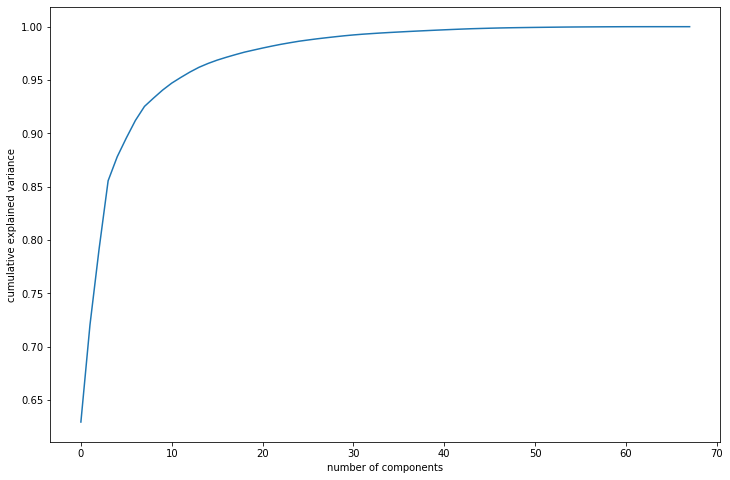

In [637]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Looks like 10 components are enough to describe around 90% of the variance in the dataset
We'll choose 10 components for our modeling.

In [638]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=10)

In [639]:
# Basis transformation - getting the data onto our PCs
df_train_pca = pca_final.fit_transform(X_train_res)
df_train_pca.shape

(38002, 10)

In [640]:
# Creating correlation matrix for the principal components - we expect little to no correlation.
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

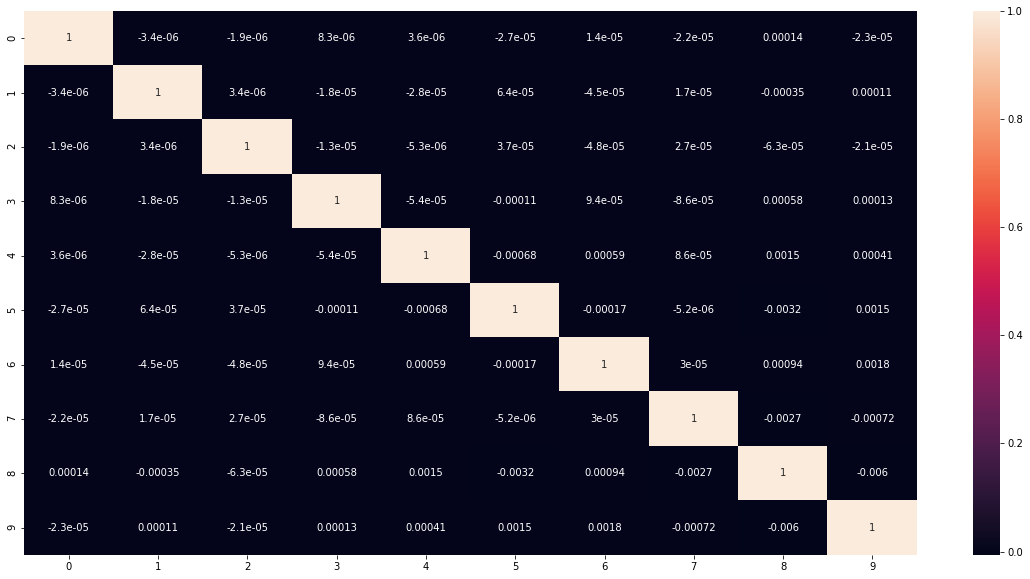

In [641]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [642]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0017597543025741373 , min corr:  -0.006016501174132195


We effectively have removed multicollinearity from our situation, and our models will be much more stable.

In [643]:
#Applying selected components to the test data - 8 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8960, 10)

In [644]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train_res)

In [645]:
#ROC AUC Score
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.76'

In [646]:
pred_probs_test = pd.DataFrame (pred_probs_test)
pred_probs_test['Predicted'] = pred_probs_test *100
#pred_probs_test.column = 'Predicted'
pred_probs_test['Predicted']= pred_probs_test.Predicted.map( lambda x: 1 if x > 50 else 0)
pred_probs_test= pred_probs_test['Predicted']
pred_probs_test.head()

0    0
1    1
2    1
3    1
4    0
Name: Predicted, dtype: int64

In [647]:
print (metrics.accuracy_score(y_test, pred_probs_test))

0.62734375


In [648]:
print('PCA:\n {}\n'.format(metrics.classification_report(y_test, pred_probs_test)))

PCA:
               precision    recall  f1-score   support

           0       0.97      0.62      0.75      8276
           1       0.14      0.75      0.23       684

    accuracy                           0.63      8960
   macro avg       0.55      0.68      0.49      8960
weighted avg       0.90      0.63      0.71      8960




In [649]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.62734375
Recall : 0.7485380116959064
Precision : 0.13916825224245719


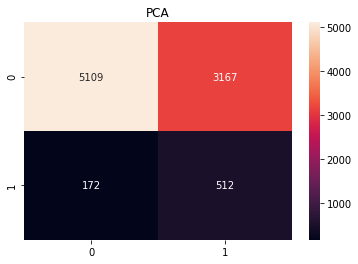

In [650]:
pca_conf_matrix = metrics.confusion_matrix(y_test, pred_probs_test)
sns.heatmap(pca_conf_matrix, annot=True,  fmt='');
title = 'PCA'
plt.title(title);

### Logistic Regression Model

In [651]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr = model_lr.fit(X_train_res, y_train_res)

In [652]:
from sklearn import metrics
#prediction on train data
prediction_train_logr = model_lr.predict(X_train)
#prediction on test data
prediction_test_logr = model_lr.predict(X_test)
# Print the prediction accuracy
print ('Logistic Regression prediction on train data accuracy:\n {}\n'.format(metrics.accuracy_score(y_train, prediction_train_logr)))
print ('Logistic Regression prediction on train data precision:\n {}\n'.format(metrics.precision_score(y_train, prediction_train_logr)))
print ('Logistic Regression prediction on test data accuracy:\n {}\n'.format(metrics.accuracy_score(y_test, prediction_test_logr)))
print ('Logistic Regression prediction on test data precision:\n {}\n'.format(metrics.precision_score(y_test, prediction_test_logr)))

Logistic Regression prediction on train data accuracy:
 0.8114236509758898

Logistic Regression prediction on train data precision:
 0.29855759731278403

Logistic Regression prediction on test data accuracy:
 0.8165178571428572

Logistic Regression prediction on test data precision:
 0.26676384839650147



In [656]:
print('Logistic Regression on train data:\n {}\n'.format(metrics.classification_report(y_train, prediction_train_logr)))
print('Logistic Regression on test data:\n {}\n'.format(metrics.classification_report(y_test, prediction_test_logr)))

Logistic Regression on train data:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89     19001
           1       0.30      0.79      0.43      1903

    accuracy                           0.81     20904
   macro avg       0.64      0.80      0.66     20904
weighted avg       0.91      0.81      0.85     20904


Logistic Regression on test data:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89      8276
           1       0.27      0.80      0.40       684

    accuracy                           0.82      8960
   macro avg       0.62      0.81      0.65      8960
weighted avg       0.93      0.82      0.85      8960




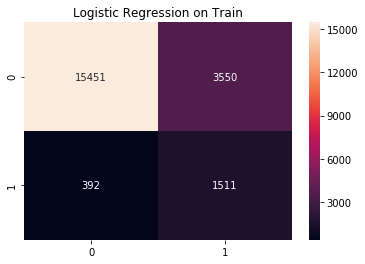

In [657]:
logistic_conf_matrix_train = metrics.confusion_matrix(y_train, prediction_train_logr)
sns.heatmap(logistic_conf_matrix_train, annot=True,  fmt='');
title = 'Logistic Regression on Train'
plt.title(title);

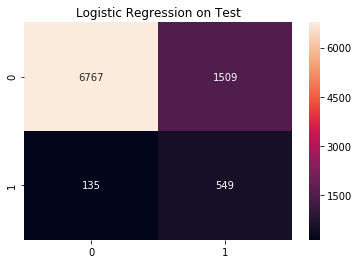

In [658]:
logistic_conf_matrix_test = metrics.confusion_matrix(y_test, prediction_test_logr)
sns.heatmap(logistic_conf_matrix_test, annot=True,  fmt='');
title = 'Logistic Regression on Test'
plt.title(title);

In [659]:
#Let's check the overall Accuracy,sensitivity and Specificity on Test Data.
total11=sum(sum(logistic_conf_matrix_train))
#####from confusion matrix calculate accuracy
accuracy11=(logistic_conf_matrix_train[0,0]+logistic_conf_matrix_train[1,1])/total11
print ('Accuracy on train data: ', round(accuracy11,2))

specificity11 = logistic_conf_matrix_train[0,0]/(logistic_conf_matrix_train[0,0]+logistic_conf_matrix_train[0,1])
print('Specificity on train data: ', round(specificity11,2))

Sensitivity11 = logistic_conf_matrix_train[1,1]/(logistic_conf_matrix_train[1,0]+logistic_conf_matrix_train[1,1])
print('Sensitivity on train data : ', round(Sensitivity11,2))

Accuracy on train data:  0.81
Specificity on train data:  0.81
Sensitivity on train data :  0.79


In [660]:
#Let's check the overall Accuracy,sensitivity and Specificity on Test Data.
total12=sum(sum(logistic_conf_matrix_test))
#####from confusion matrix calculate accuracy
accuracy12=(logistic_conf_matrix_test[0,0]+logistic_conf_matrix_test[1,1])/total12
print ('Accuracy on test data : ', round(accuracy12,2))

specificity12 = logistic_conf_matrix_test[0,0]/(logistic_conf_matrix_test[0,0]+logistic_conf_matrix_test[0,1])
print('Specificity on test data : ', round(specificity12,2))

Sensitivity12 = logistic_conf_matrix_test[1,1]/(logistic_conf_matrix_test[1,0]+logistic_conf_matrix_test[1,1])
print('Sensitivity on test data : ', round(Sensitivity12,2))

Accuracy on test data :  0.82
Specificity on test data :  0.82
Sensitivity on test data :  0.8


In [661]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

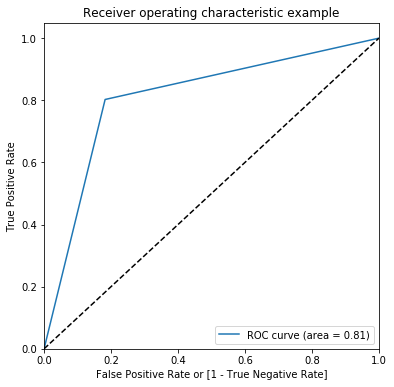

(array([0.        , 0.18233446, 1.        ]),
 array([0.        , 0.80263158, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [662]:
draw_roc(y_test, prediction_test_logr)

In [663]:
# ROC AUC Score.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_logr)))
print("ROC Score on Test Data {:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_logr)))

ROC Score on Train Data 0.80
ROC Score on Test Data 0.81


In [673]:
# To get the weights of all the variables
weights_lr = pd.Series(model_lr.coef_[0],
                 index=X.columns.values)

Text(0.5, 1.0, 'Important Coefficients in the Logistic Regression Model')

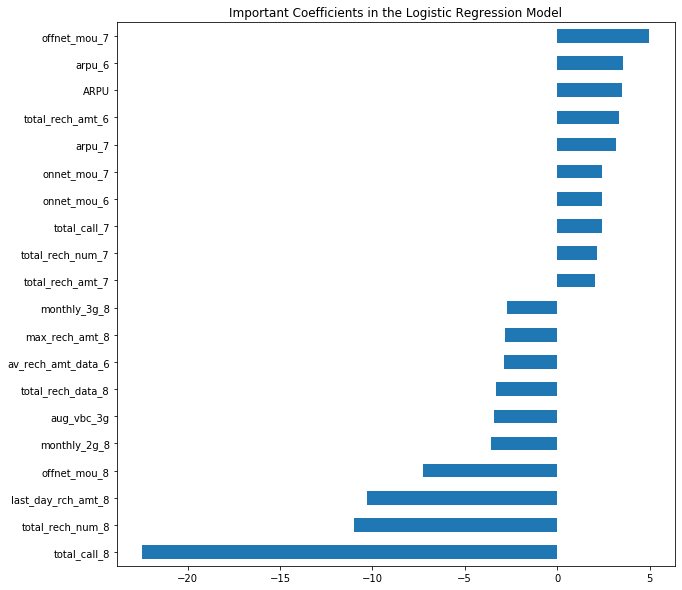

In [674]:
imp_coef_lr = pd.concat([weights_lr.sort_values().head(10),
                     weights_lr.sort_values().tail(10)])
fig = plt.figure(figsize = (10,10))
imp_coef_lr.plot(kind = "barh")
plt.title("Important Coefficients in the Logistic Regression Model")

#### Logistic Regression Model Performance
| Model/Metrics | Train | Test |
| --- | --- | --- |
| Logistic Regression |  |  |
| Roc_auc_score | 0.80 | 0.81 |
| Sensitivity/Recall | 0.79 | 0.80 |
| Specificity | 0.81 | 0.82 |
| precision | 0.30 | 0.27 |

### Random Forest

In [675]:
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

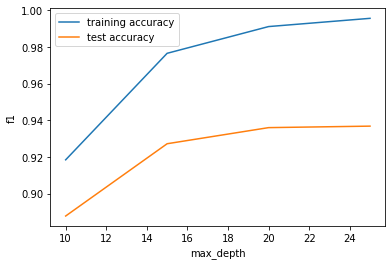

In [683]:
from sklearn.ensemble import RandomForestClassifier
# Tuning max_depth
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters, 
                    cv=5,return_train_score=True)
rfgs.fit(X_train_res,y_train_res)

plot_traintestAcc(rfgs.cv_results_,'max_depth')

We are chossing max_depth = 20 as test score is constant after it.

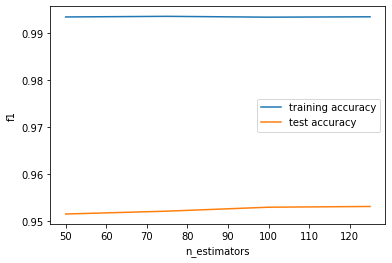

In [690]:
# Tuning n_estimator
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(max_depth=20,random_state=10)
rfgs = GridSearchCV(rf1,parameters, 
                    cv=5,return_train_score=True)
rfgs.fit(X_train_res,y_train_res)

plot_traintestAcc(rfgs.cv_results_,'n_estimators')

Selecting n_estimators = 80

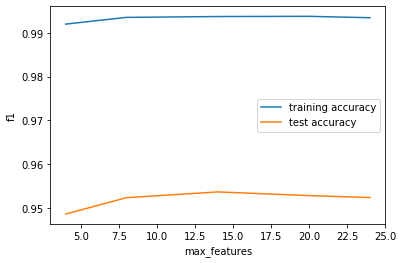

In [691]:
# Tuning max features
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf2 = RandomForestClassifier(max_depth=20,n_estimators=80,random_state=10)
rfgs = GridSearchCV(rf2,parameters, 
                    cv=5,return_train_score=True)
rfgs.fit(X_train_res,y_train_res)

plot_traintestAcc(rfgs.cv_results_,'max_features')

selecting max_features = 8

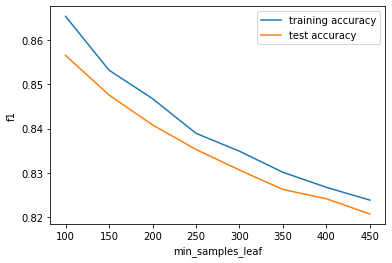

In [693]:
#Tuning min_samples_leaf
parameters = {'min_samples_leaf': range (100,500,50)}
rf3 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=8, random_state=10)
rfgs = GridSearchCV(rf3,parameters, 
                    cv=5,return_train_score=True)
rfgs.fit(X_train_res,y_train_res)

plot_traintestAcc(rfgs.cv_results_,'min_samples_leaf')

Selecting min_sample_leaf = 100

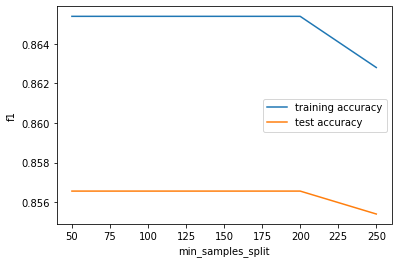

In [694]:
#Tuning min_samples_split
parameters = {'min_samples_split': range (50,300,50)}
rf4 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=8,min_samples_leaf=100,random_state=10)
rfgs = GridSearchCV(rf4,parameters, 
                    cv=5,return_train_score=True)
rfgs.fit(X_train_res,y_train_res)

plot_traintestAcc(rfgs.cv_results_,'min_samples_split')

Selecting min_sample_split = 200

In [696]:
# Tunned Random Forest
model_rf = RandomForestClassifier(max_depth=20,
                                  n_estimators=80,
                                  max_features=5,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)
model_rf.fit(X_train_res, y_train_res)
# Make predictions on Test Data
prediction_train_rf = model_rf.predict(X_train)
# Make predictions on Test Data
prediction_test_rf = model_rf.predict(X_test)
print ('Random Forest accuracy on train data:\n {}\n'.format(metrics.accuracy_score(y_train, prediction_train_rf)))
print ('Random Forest preciosn on train data:\n {}\n'.format(metrics.precision_score(y_train, prediction_train_rf)))
print ('Random Forest accuracy on test data :\n {}\n'.format(metrics.accuracy_score(y_test, prediction_test_rf)))
print ('Random Forest precision on test data:\n {}\n'.format(metrics.precision_score(y_test, prediction_test_rf)))

Random Forest accuracy on train data:
 0.8970053578262533

Random Forest preciosn on train data:
 0.4581659973226238

Random Forest accuracy on test data :
 0.8959821428571428

Random Forest precision on test data:
 0.3968386023294509



In [697]:
print('Random Forest on Train Data:\n {}\n'.format(metrics.classification_report(y_train, prediction_train_rf)))
print('Random Forest on Test Data:\n {}\n'.format(metrics.classification_report(y_test, prediction_test_rf)))

Random Forest on Train Data:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     19001
           1       0.46      0.72      0.56      1903

    accuracy                           0.90     20904
   macro avg       0.71      0.82      0.75     20904
weighted avg       0.92      0.90      0.91     20904


Random Forest on Test Data:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      8276
           1       0.40      0.70      0.51       684

    accuracy                           0.90      8960
   macro avg       0.69      0.80      0.72      8960
weighted avg       0.93      0.90      0.91      8960




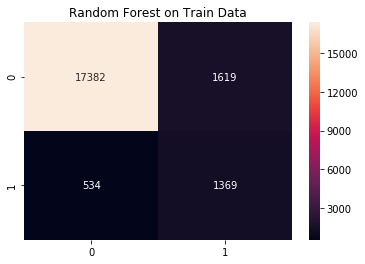

In [698]:
rf_conf_matrix_train = metrics.confusion_matrix(y_train, prediction_train_rf)
sns.heatmap(rf_conf_matrix_train, annot=True,  fmt='');
title = 'Random Forest on Train Data'
plt.title(title);

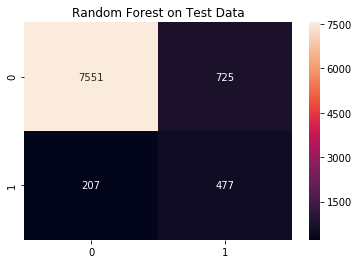

In [699]:
rf_conf_matrix_test = metrics.confusion_matrix(y_test, prediction_test_rf)
sns.heatmap(rf_conf_matrix_test, annot=True,  fmt='');
title = 'Random Forest on Test Data'
plt.title(title);

In [700]:
#Let's check the overall Accuracy,sensitivity and Specificity on Train Data.
total21=sum(sum(rf_conf_matrix_train))
#####from confusion matrix calculate accuracy
accuracy21=(rf_conf_matrix_train[0,0]+rf_conf_matrix_train[1,1])/total21
print ('Accuracy : ', round(accuracy21,2))

specificity21 = rf_conf_matrix_train[0,0]/(rf_conf_matrix_train[0,0]+rf_conf_matrix_train[0,1])
print('Specificity : ', round(specificity21,2))

Sensitivity21 = rf_conf_matrix_train[1,1]/(rf_conf_matrix_train[1,0]+rf_conf_matrix_train[1,1])
print('Sensitivity : ', round(Sensitivity21,2))

Accuracy :  0.9
Specificity :  0.91
Sensitivity :  0.72


In [701]:
#Let's check the overall Accuracy,sensitivity and Specificity on Test Data.
total22=sum(sum(rf_conf_matrix_test))
#####from confusion matrix calculate accuracy
accuracy22=(rf_conf_matrix_test[0,0]+rf_conf_matrix_test[1,1])/total22
print ('Accuracy : ', round(accuracy22,2))

specificity22 = rf_conf_matrix_test[0,0]/(rf_conf_matrix_test[0,0]+rf_conf_matrix_test[0,1])
print('Specificity : ', round(specificity22,2))

Sensitivity22 = rf_conf_matrix_test[1,1]/(rf_conf_matrix_test[1,0]+rf_conf_matrix_test[1,1])
print('Sensitivity : ', round(Sensitivity22,2))

Accuracy :  0.9
Specificity :  0.91
Sensitivity :  0.7


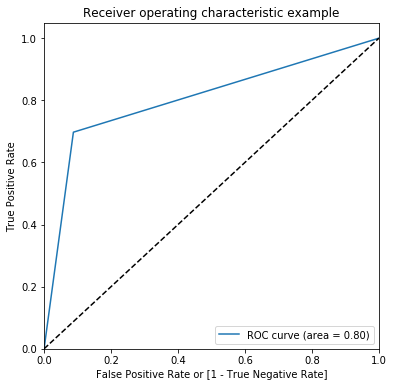

(array([0.        , 0.08760271, 1.        ]),
 array([0.        , 0.69736842, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [702]:
# ROC curve
draw_roc(y_test, prediction_test_rf)

In [703]:
# ROC AUC Score.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_rf)))
print("ROC Score on Test Data{:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_rf)))

ROC Score on Train Data 0.82
ROC Score on Test Data0.80


In [704]:
# To get the weights of all the variables
importances = model_rf.feature_importances_
weights_rf = pd.Series(importances,
                 index=X.columns.values)

Text(0.5, 1.0, 'Important Coefficients in the Random Forest Model')

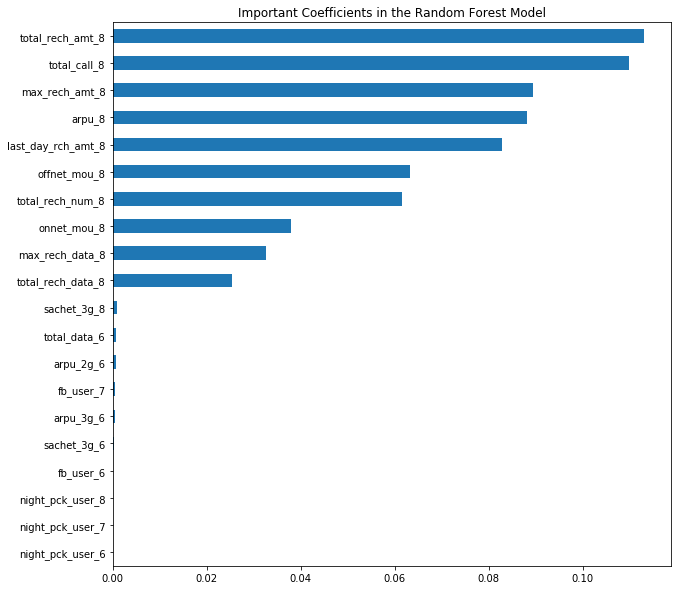

In [705]:
imp_coef_rf = pd.concat([weights_rf.sort_values().head(10),
                     weights_rf.sort_values().tail(10)])
fig = plt.figure(figsize = (10,10))
imp_coef_rf.plot(kind = "barh")
plt.title("Important Coefficients in the Random Forest Model")

#### Randam Forest Model Performance
| Model/Metrics | Train | Test |
| --- | --- | --- |
| Randam Forest |  |  |
| Roc_auc_score | 0.82 | 0.80 |
| Sensitivity/Recall | 0.72 | 0.70 |
| Specificity | 0.91 | 0.91|
| Precision | 0.46 | 0.40|

### Support vector machine

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 41.5min finished


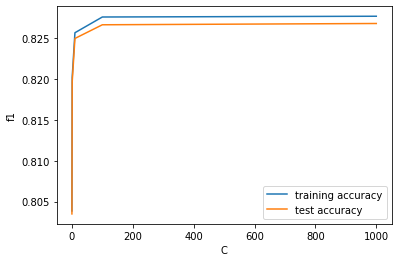

In [706]:
from sklearn.svm import SVC
# specify range of parameters (C) cost as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

svm = SVC(kernel='linear')
model_cv = GridSearchCV(estimator = svm, param_grid = params, 
                        scoring= 'f1', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs=4,
                       return_train_score=True) 
model_cv.fit(X_train_res, y_train_res)
plot_traintestAcc(model_cv.cv_results_,'C')

In [707]:
model_cv.best_params_

{'C': 1000}

In [708]:
# Support vector machine
model_svm = SVC(C = 1000) 
model_svm.fit(X_train_res,y_train_res)
# prediction on train data
prediction_train_svm = model_svm.predict(X_train)
#prediction on test data
prediction_test_svm = model_svm.predict(X_test)
print ('SVM accuracy on train data:\n {}\n'.format(metrics.accuracy_score(y_train, prediction_train_svm)))
print ('SVM preciosn on train data:\n {}\n'.format(metrics.precision_score(y_train, prediction_train_svm)))
print ('SVM accuracy on test data :\n {}\n'.format(metrics.accuracy_score(y_test, prediction_test_svm)))
print ('SVM precision on test data:\n {}\n'.format(metrics.precision_score(y_test, prediction_test_svm)))

SVM accuracy on train data:
 0.8498851894374282

SVM preciosn on train data:
 0.35629508959739353

SVM accuracy on test data :
 0.8503348214285714

SVM precision on test data:
 0.31153184165232356



In [709]:
print('SVM on Train Data :\n {}\n'.format(metrics.classification_report(y_train, prediction_train_svm)))
print('SVM on Test Data:\n {}\n'.format(metrics.classification_report(y_test, prediction_test_svm)))

SVM on Train Data :
               precision    recall  f1-score   support

           0       0.98      0.85      0.91     19001
           1       0.36      0.80      0.49      1903

    accuracy                           0.85     20904
   macro avg       0.67      0.83      0.70     20904
weighted avg       0.92      0.85      0.87     20904


SVM on Test Data:
               precision    recall  f1-score   support

           0       0.98      0.86      0.91      8276
           1       0.31      0.79      0.45       684

    accuracy                           0.85      8960
   macro avg       0.65      0.82      0.68      8960
weighted avg       0.93      0.85      0.88      8960




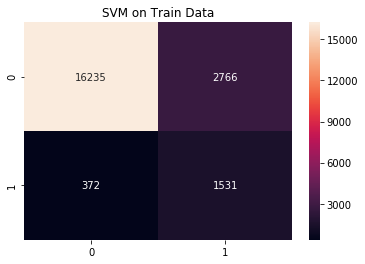

In [710]:
svm_conf_matrix_train = metrics.confusion_matrix(y_train, prediction_train_svm)
sns.heatmap(svm_conf_matrix_train, annot=True,  fmt='');
title = 'SVM on Train Data'
plt.title(title);

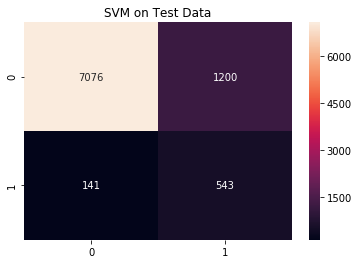

In [711]:
svm_conf_matrix_test = metrics.confusion_matrix(y_test, prediction_test_svm)
sns.heatmap(svm_conf_matrix_test, annot=True,  fmt='');
title = 'SVM on Test Data'
plt.title(title);

In [712]:
#Let's check the overall Accuracy,sensitivity and Specificity on train data.
total31=sum(sum(svm_conf_matrix_train))
#####from confusion matrix calculate accuracy
accuracy31=(svm_conf_matrix_train[0,0]+svm_conf_matrix_train[1,1])/total31
print ('Accuracy : ', round(accuracy31,2))

specificity31 = svm_conf_matrix_train[0,0]/(svm_conf_matrix_train[0,0]+svm_conf_matrix_train[0,1])
print('Specificity : ', round(specificity31,2))

Sensitivity31 = svm_conf_matrix_train[1,1]/(svm_conf_matrix_train[1,0]+svm_conf_matrix_train[1,1])
print('Sensitivity : ', round(Sensitivity31,2))

Accuracy :  0.85
Specificity :  0.85
Sensitivity :  0.8


In [713]:
#Let's check the overall Accuracy,sensitivity and Specificity on test data.
total32=sum(sum(svm_conf_matrix_test))
#####from confusion matrix calculate accuracy
accuracy32=(svm_conf_matrix_test[0,0]+svm_conf_matrix_test[1,1])/total32
print ('Accuracy : ', round(accuracy32,2))

specificity32 = svm_conf_matrix_test[0,0]/(svm_conf_matrix_test[0,0]+svm_conf_matrix_test[0,1])
print('Specificity : ', round(specificity32,2))

Sensitivity32 = svm_conf_matrix_test[1,1]/(svm_conf_matrix_test[1,0]+svm_conf_matrix_test[1,1])
print('Sensitivity : ', round(Sensitivity32,2))

Accuracy :  0.85
Specificity :  0.86
Sensitivity :  0.79


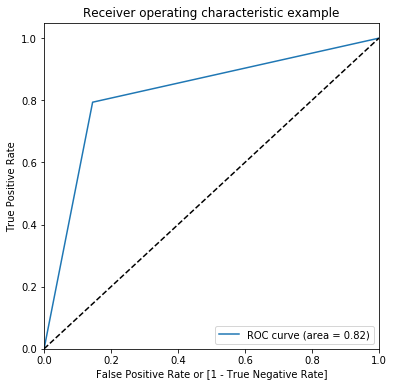

(array([0.        , 0.14499758, 1.        ]),
 array([0.        , 0.79385965, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [714]:
# ROC curve
draw_roc(y_test, prediction_test_svm)

In [715]:
# ROC AUC Score.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_svm)))
print("ROC Score on Test Data{:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_svm)))

ROC Score on Train Data 0.83
ROC Score on Test Data0.82


#### SVM Model Performance
| Model/Metrics | Train | Test |
| --- | --- | --- |
| SVM |  |  |
| Roc_auc_score | 0.83 | 0.82 |
| Sensitivity/Recall | 0.8 | 0.79 |
| Specificity | 0.85 | 0.86|
| Precision | 0.36 | 0.31|

### XgBoost Algorithm

In [738]:
from xgboost import XGBClassifier

# Hyperparameter tunning for the XGBClassifer
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train_res, y_train_res)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.9466990870607287)

In [739]:
# Some more hyperparameter tunning for the XGBClassifer
param_test2 = param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch2.fit(X_train_res, y_train_res)
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, 0.9466990870607287)

In [742]:
# Final XgBoost Algorithm

model_xgboost = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
model_xgboost.fit(X_train_res,y_train_res)
X_train_xg = X_train.as_matrix()
X_test_xg = X_test.as_matrix()
# prediction on train data
prediction_train_xgboost = model_xgboost.predict(X_train_xg)
#prediction on test data
prediction_test_xgboost = model_xgboost.predict(X_test_xg)
print ('XgBoost accuracy on train data:\n {}\n'.format(metrics.accuracy_score(y_train, prediction_train_xgboost)))
print ('XgBoost preciosn on train data:\n {}\n'.format(metrics.precision_score(y_train, prediction_train_xgboost)))
print ('XgBoost accuracy on test data :\n {}\n'.format(metrics.accuracy_score(y_test, prediction_test_xgboost)))
print ('XgBoost precision on test data:\n {}\n'.format(metrics.precision_score(y_test, prediction_test_xgboost)))

XgBoost accuracy on train data:
 0.9934462303865289

XgBoost preciosn on train data:
 0.9905555555555555

XgBoost accuracy on test data :
 0.93828125

XgBoost precision on test data:
 0.6089850249584027



In [743]:
print('Xg Boost on train data :\n {}\n'.format(metrics.classification_report(y_train, prediction_train_xgboost)))
print('Xg Booston test data :\n {}\n'.format(metrics.classification_report(y_test, prediction_test_xgboost)))

Xg Boost on train data :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     19001
           1       0.99      0.94      0.96      1903

    accuracy                           0.99     20904
   macro avg       0.99      0.97      0.98     20904
weighted avg       0.99      0.99      0.99     20904


Xg Booston test data :
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      8276
           1       0.61      0.54      0.57       684

    accuracy                           0.94      8960
   macro avg       0.79      0.75      0.77      8960
weighted avg       0.94      0.94      0.94      8960




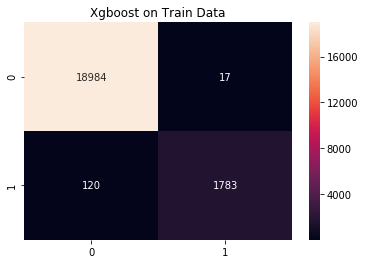

In [744]:
xgboost_conf_matrix_train = metrics.confusion_matrix(y_train, prediction_train_xgboost)
sns.heatmap(xgboost_conf_matrix_train, annot=True,  fmt='');
title = 'Xgboost on Train Data'
plt.title(title);

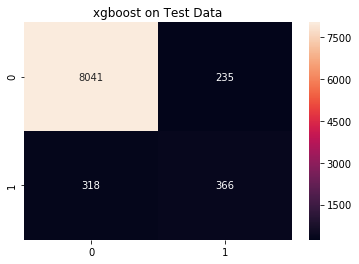

In [745]:
xgboost_conf_matrix_test = metrics.confusion_matrix(y_test, prediction_test_xgboost)
sns.heatmap(xgboost_conf_matrix_test, annot=True,  fmt='');
title = 'xgboost on Test Data'
plt.title(title);

In [746]:
#Let's check the overall Accuracy,sensitivity and Specificity on train data.
total41=sum(sum(xgboost_conf_matrix_train))
#####from confusion matrix calculate accuracy
accuracy41=(xgboost_conf_matrix_train[0,0]+xgboost_conf_matrix_train[1,1])/total41
print ('Accuracy : ', round(accuracy41,2))

specificity41 = xgboost_conf_matrix_train[0,0]/(xgboost_conf_matrix_train[0,0]+xgboost_conf_matrix_train[0,1])
print('Specificity : ', round(specificity41,2))

Sensitivity41 = xgboost_conf_matrix_train[1,1]/(xgboost_conf_matrix_train[1,0]+xgboost_conf_matrix_train[1,1])
print('Sensitivity : ', round(Sensitivity41,2))

Accuracy :  0.99
Specificity :  1.0
Sensitivity :  0.94


In [747]:
#Let's check the overall Accuracy,sensitivity and Specificity on test data.
total42=sum(sum(xgboost_conf_matrix_test))
#####from confusion matrix calculate accuracy
accuracy42=(xgboost_conf_matrix_test[0,0]+xgboost_conf_matrix_test[1,1])/total42
print ('Accuracy : ', round(accuracy42,2))

specificity42 = xgboost_conf_matrix_test[0,0]/(xgboost_conf_matrix_test[0,0]+xgboost_conf_matrix_test[0,1])
print('Specificity : ', round(specificity42,2))

Sensitivity42 = xgboost_conf_matrix_test[1,1]/(xgboost_conf_matrix_test[1,0]+xgboost_conf_matrix_test[1,1])
print('Sensitivity : ', round(Sensitivity42,2))

Accuracy :  0.94
Specificity :  0.97
Sensitivity :  0.54


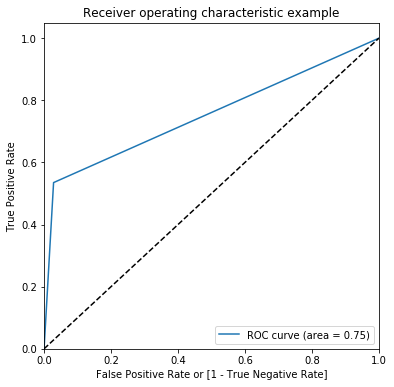

(array([0.        , 0.02839536, 1.        ]),
 array([0.        , 0.53508772, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [748]:
# ROC curve
draw_roc(y_test, prediction_test_xgboost)

In [750]:
# ROC AUC Score.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_xgboost)))
print("ROC Score on Test Data {:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_xgboost)))

ROC Score on Train Data 0.97
ROC Score on Test Data 0.75


In [751]:
# To get the weights of all the variables
importances_xgboost = model_xgboost.feature_importances_
weights_xgboost = pd.Series(importances_xgboost,
                 index=X.columns.values)

Text(0.5, 1.0, 'Important Coefficients in the Xg Boost Model')

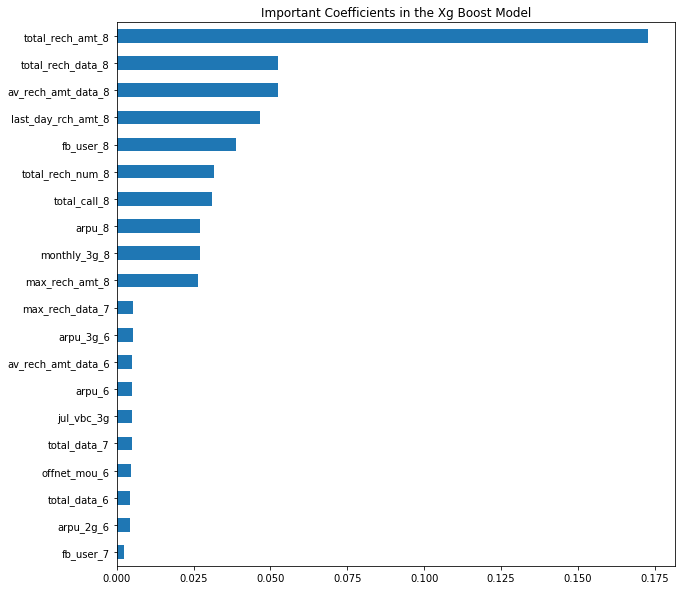

In [752]:
imp_coef_xgboost = pd.concat([weights_xgboost.sort_values().head(10),
                     weights_xgboost.sort_values().tail(10)])
fig = plt.figure(figsize = (10,10))
imp_coef_xgboost.plot(kind = "barh")
plt.title("Important Coefficients in the Xg Boost Model")

#### XgBoost Model Performance
| Model/Metrics | Train | Test |
| --- | --- | --- |
| XgBoost |  |  |
| Roc_auc_score | 0.97 | 0.75 |
| Sensitivity/Recall | 0.94 | 0.54 |
| Specificity | 1 | 0.97|
| Precision | 0.99 | 0.61|

### Gradient Boost

In [720]:
# tune hyper parameter for Gradient Boost Algorithm
from sklearn.ensemble import GradientBoostingClassifier
# Hyperparameter tuning for n_estimators
param_test1 = {'n_estimators':range(20,150,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train_res, y_train_res)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [721]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 140}, 0.9413892850937627)

In [723]:
# Hyperparameter tuning for max_depth and min_sample_split
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch2.fit(X_train_res, y_train_res)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 15, 'min_samples_split': 200}, 0.9545375743991519)

In [724]:
# Hyperparameter tuning for min_sample_leaf
param_test3 = {'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=15,min_samples_split=200, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch3.fit(X_train_res, y_train_res)
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 40}, 0.9531101000100014)

In [725]:
# Hyperparameter tuning for max_features
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=15, min_samples_split=200, min_samples_leaf=40, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch4.fit(X_train_res, y_train_res)
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 7}, 0.9525059461107531)

In [726]:
# Tunned Gradient Boost Algorithm
model_gdboost = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_features=7,max_depth=15, min_samples_split=200, min_samples_leaf=40, subsample=0.8, random_state=10)
model_gdboost.fit(X_train_res, y_train_res)
#prediction on train data.
prediction_train_grdboost= model_gdboost.predict(X_train)
# prediction on test data
prediction_test_grdboost= model_gdboost.predict(X_test)
metrics.accuracy_score(y_test, prediction_test_grdboost)
print ('Gradient Boost accuracy on train data:\n {}\n'.format(metrics.accuracy_score(y_train, prediction_train_grdboost)))
print ('Gradient Boost preciosn on train data:\n {}\n'.format(metrics.precision_score(y_train, prediction_train_grdboost)))
print ('Gradient Boost accuracy on test data :\n {}\n'.format(metrics.accuracy_score(y_test, prediction_test_grdboost)))
print ('Gradient Boost precision on test data:\n {}\n'.format(metrics.precision_score(y_test, prediction_test_grdboost)))

Gradient Boost accuracy on train data:
 0.996268656716418

Gradient Boost preciosn on train data:
 0.9861481086840703

Gradient Boost accuracy on test data :
 0.9332589285714286

Gradient Boost precision on test data:
 0.5645645645645646



In [727]:
print('Gradient Boost on train data :\n {}\n'.format(metrics.classification_report(y_train, prediction_train_grdboost)))
print('Gradient Boost on test data :\n {}\n'.format(metrics.classification_report(y_test, prediction_test_grdboost)))

Gradient Boost on train data :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19001
           1       0.99      0.97      0.98      1903

    accuracy                           1.00     20904
   macro avg       0.99      0.99      0.99     20904
weighted avg       1.00      1.00      1.00     20904


Gradient Boost on test data :
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      8276
           1       0.56      0.55      0.56       684

    accuracy                           0.93      8960
   macro avg       0.76      0.76      0.76      8960
weighted avg       0.93      0.93      0.93      8960




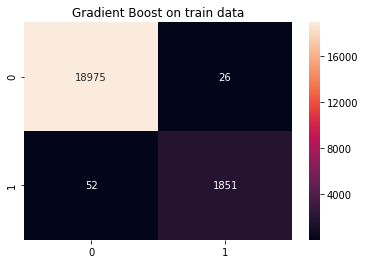

In [728]:
gradboost_conf_matrix_train = metrics.confusion_matrix(y_train, prediction_train_grdboost)
sns.heatmap(gradboost_conf_matrix_train, annot=True,  fmt='');
title = 'Gradient Boost on train data'
plt.title(title);

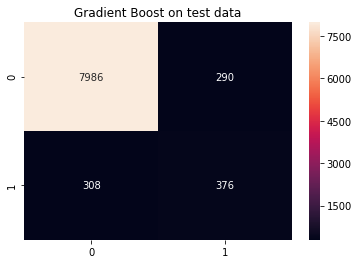

In [729]:
gradboost_conf_matrix_test = metrics.confusion_matrix(y_test, prediction_test_grdboost)
sns.heatmap(gradboost_conf_matrix_test, annot=True,  fmt='');
title = 'Gradient Boost on test data'
plt.title(title);

In [730]:
#Let's check the overall Accuracy,sensitivity and Specificity on train data.
total51=sum(sum(gradboost_conf_matrix_train))
#####from confusion matrix calculate accuracy
accuracy51=(gradboost_conf_matrix_train[0,0]+gradboost_conf_matrix_train[1,1])/total51
print ('Accuracy : ', round(accuracy51,2))

specificity51 = gradboost_conf_matrix_train[0,0]/(gradboost_conf_matrix_train[0,0]+gradboost_conf_matrix_train[0,1])
print('Specificity : ', round(specificity51,2))

Sensitivity51 = gradboost_conf_matrix_train[1,1]/(gradboost_conf_matrix_train[1,0]+gradboost_conf_matrix_train[1,1])
print('Sensitivity : ', round(Sensitivity51,2))

Accuracy :  1.0
Specificity :  1.0
Sensitivity :  0.97


In [731]:
#Let's check the overall Accuracy,sensitivity and Specificity on test data.
total52=sum(sum(gradboost_conf_matrix_test))
#####from confusion matrix calculate accuracy
accuracy52=(gradboost_conf_matrix_test[0,0]+gradboost_conf_matrix_test[1,1])/total52
print ('Accuracy : ', round(accuracy52,2))

specificity52 = gradboost_conf_matrix_test[0,0]/(gradboost_conf_matrix_test[0,0]+gradboost_conf_matrix_test[0,1])
print('Specificity : ', round(specificity52,2))

Sensitivity52 = gradboost_conf_matrix_test[1,1]/(gradboost_conf_matrix_test[1,0]+gradboost_conf_matrix_test[1,1])
print('Sensitivity : ', round(Sensitivity52,2))

Accuracy :  0.93
Specificity :  0.96
Sensitivity :  0.55


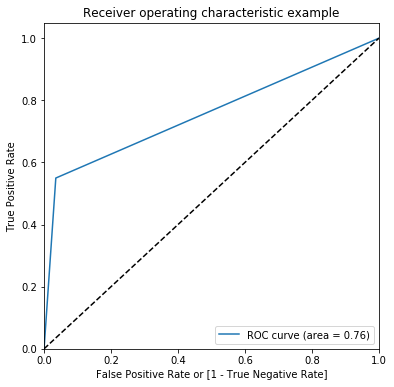

(array([0.        , 0.03504108, 1.        ]),
 array([0.       , 0.5497076, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [732]:
# ROC curve
draw_roc(y_test, prediction_test_grdboost)

In [733]:
# ROC AUC Score.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_grdboost)))
print("ROC Score on Test Data {:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_grdboost)))

ROC Score on Train Data 0.99
ROC Score on Test Data 0.76


In [734]:
# To get the weights of all the variables
importances_grdboost = model_gdboost.feature_importances_
weights_grdboost = pd.Series(importances_grdboost,
                 index=X.columns.values)

Text(0.5, 1.0, 'Important Coefficients in the grd Boost Model')

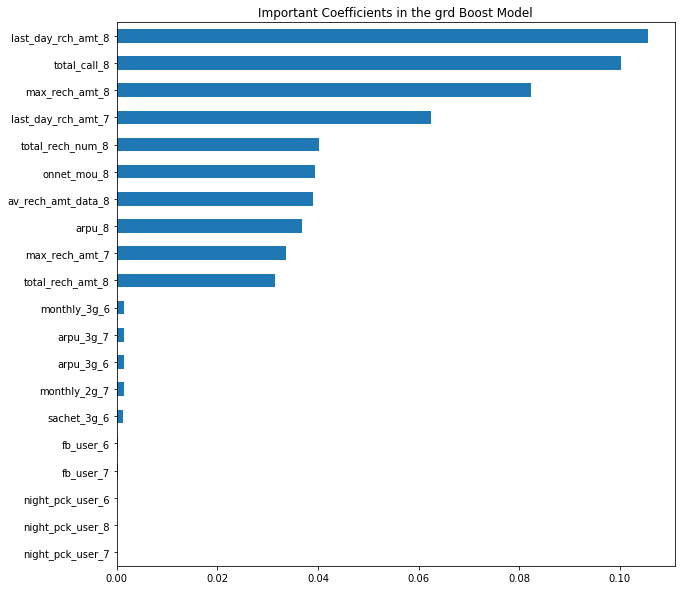

In [735]:
imp_coef_gdboost = pd.concat([weights_grdboost.sort_values().head(10),
                     weights_grdboost.sort_values().tail(10)])
fig = plt.figure(figsize = (10,10))
imp_coef_gdboost.plot(kind = "barh")
plt.title("Important Coefficients in the grd Boost Model")

#### Gradient Boost Model Performance
| Model/Metrics | Train | Test |
| --- | --- | --- |
| Gradient Boost |  |  |
| Roc_auc_score | 0.99 | 0.76 |
| Sensitivity/Recall | 0.97 | 0.55 |
| Specificity | 1 | 0.96|
| Precision | 0.99 | 0.56|

###### GradientBoost hyperparameter modeling

### All Model Comparison:

| Model/Metrics | Train | Test |
| --- | --- | --- |
| Logistic Regression |  |  |
| Roc_auc_score | 0.80 | 0.81 |
| Sensitivity/Recall | 0.79 | 0.80 |
| Specificity | 0.81 | 0.82 |
| precision | 0.30 | 0.27 |
| --- | --- | --- |
| Randam Forest |  |  |
| Roc_auc_score | 0.82 | 0.80 |
| Sensitivity/Recall | 0.72 | 0.70 |
| Specificity | 0.91 | 0.91|
| Precision | 0.46 | 0.40|
| --- | --- | --- |
| SVM |  |  |
| Roc_auc_score | 0.83 | 0.82 |
| Sensitivity/Recall | 0.8 | 0.79 |
| Specificity | 0.85 | 0.86|
| Precision | 0.36 | 0.31|
| --- | --- | --- |
| XgBoost |  |  |
| Roc_auc_score | 0.97 | 0.75 |
| Sensitivity/Recall | 0.94 | 0.54 |
| Specificity | 1 | 0.97|
| Precision | 0.99 | 0.61|
| --- | --- | --- |
| Gradient Boost |  |  |
| Roc_auc_score | 0.99 | 0.76 |
| Sensitivity/Recall | 0.97 | 0.55 |
| Specificity | 1 | 0.96|
| Precision | 0.99 | 0.56|

#### Final Choice of Model
Recall is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives.
Overall, the Logistic Regression model performs best. It achieved the best recall accuracy of 80% for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting. The precision is compromised in this effort but the business objective to predict Churn customers is most accuratety captured by it. The Xg boost and gradient boost classfier seems tend to overfit training data.

Text(0.5, 1.0, 'Important Coefficients in the Random Forest Model')

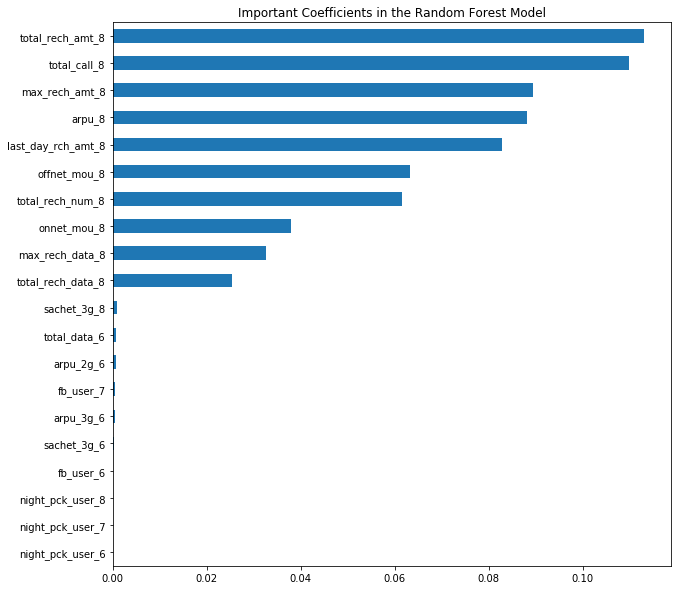

In [755]:
#### Important churn features in Random Forest model as multicolinearity is lesser compare to logistic regression.
fig = plt.figure(figsize = (10,10))
imp_coef_rf.plot(kind = "barh")
plt.title("Important Coefficients in the Random Forest Model")

Top features contributed towards predicting churn is the monthly KPI value from month 8 as below.
'total_rech_num_8','total_call_8','max_rech_amt_8','arpu_8','last_day_rch_amt_8','offnet_mou_8',
'total_rech_num_8','onnet_mou_8','max_rech_data_8','total_rech_data_8' etc.

#### Strategies to manage customer churn.

1. Customer churn seems to be well predicted by drop in usage.

While using the Machine Learning model for predicting churn, the telecom company should pay close attention to drop in MoU, ARPU and data usage (2g and 3g) month over month. If feasible, the company should track these numbers week over week. Since billing cycles are typically monthly, a drop in usage numbers will give the company time to react when tracked at weekly level.Marketing team must come up with campaigns which targets these high-value to-be churner.